## First lets import all the libraries that we will need

In [1]:
%matplotlib inline 

import matplotlib
import matplotlib.pyplot as plt
matplotlib.rcParams["font.family"] = "sans-serif"

import numpy as np  # to convert the image

# to deal with images Python Image Library
import PIL.Image as Image

In [2]:
#Reading the image
im_fl = Image.open("C:/Users/npali/Data_Viz/Week_2/flower.png")

### The Vibrant Flower Image.
* I have chosen this Image as it contains very vibrant colours in it and at a backdrop of dark colours. here the colour saturation is mostly towrds the Magenta section 

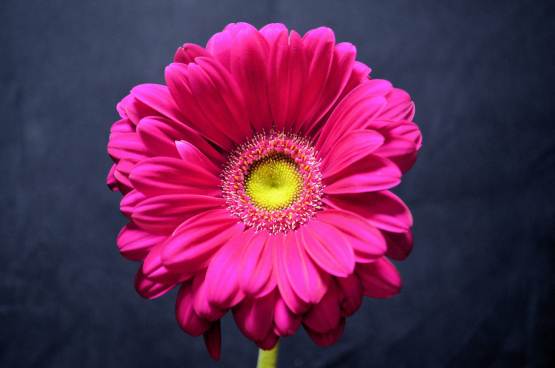

In [3]:
im_fl

In [4]:
# Creating array for the above image
fl_data = np.array(im_fl)


In [5]:
fl_data.shape # This is a 368*555 image with only 3 Channels

(368, 555, 3)

#### Now we will check the number of colours in the above image (RGB Combination)

In [6]:
channel_labels = ['R', 'G', 'B', 'A']
for i in range(fl_data.shape[2]): # this loops over the last entry of the shape array, so the #4
    print('channel=', channel_labels[i], 
          'unique values=', np.unique( fl_data[:,:,i] ) ) # print the unique elements in each channel

channel= R unique values= [  0   1   2   3   4   5   6   7   8   9  10  11  12  13  14  15  16  17
  18  19  20  21  22  23  24  25  26  27  28  29  30  31  32  33  34  35
  36  37  38  39  40  41  42  43  44  45  46  47  48  49  50  51  52  53
  54  55  56  57  58  59  60  61  62  63  64  65  66  67  68  69  70  71
  72  73  74  75  76  77  78  79  80  81  82  83  84  85  86  87  88  89
  90  91  92  93  94  95  96  97  98  99 100 101 102 103 104 105 106 107
 108 109 110 111 112 113 114 115 116 117 118 119 120 121 122 123 124 125
 126 127 128 129 130 131 132 133 134 135 136 137 138 139 140 141 142 143
 144 145 146 147 148 149 150 151 152 153 154 155 156 157 158 159 160 161
 162 163 164 165 166 167 168 169 170 171 172 173 174 175 176 177 178 179
 180 181 182 183 184 185 186 187 188 189 190 191 192 193 194 195 196 197
 198 199 200 201 202 203 204 205 206 207 208 209 210 211 212 213 214 215
 216 217 218 219 220 221 222 223 224 225 226 227 228 229 230 231 232 233
 234 235 236 237 238 239 

As you can see above it is possible to check the values of different RGB combinations , it is very difficult to analyse which color combination occurs the most and what number of pixels does it occupy.

In [7]:
np.unique(fl_data) # All the uniuqe color code in the image. This is very huge

array([  0,   1,   2,   3,   4,   5,   6,   7,   8,   9,  10,  11,  12,
        13,  14,  15,  16,  17,  18,  19,  20,  21,  22,  23,  24,  25,
        26,  27,  28,  29,  30,  31,  32,  33,  34,  35,  36,  37,  38,
        39,  40,  41,  42,  43,  44,  45,  46,  47,  48,  49,  50,  51,
        52,  53,  54,  55,  56,  57,  58,  59,  60,  61,  62,  63,  64,
        65,  66,  67,  68,  69,  70,  71,  72,  73,  74,  75,  76,  77,
        78,  79,  80,  81,  82,  83,  84,  85,  86,  87,  88,  89,  90,
        91,  92,  93,  94,  95,  96,  97,  98,  99, 100, 101, 102, 103,
       104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116,
       117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129,
       130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142,
       143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155,
       156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168,
       169, 170, 171, 172, 173, 174, 175, 176, 177, 178, 179, 18

### As the number of colors in this image is very large I have used the convert_image function to pick up the most dominant colours of the image.

In [8]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import PIL.Image as Image

# we won't use these packages directly, but the function that picks colors will
import scipy
import scipy.misc
import scipy.cluster

# If you haven't yet, you may need to install scipy
#!conda install -c anaconda scipy

# NOTE: I am not expecting you to know how to write these on your own!
def quantizetopalette(silf, palette, dither=False):
    """Convert an RGB or L mode image to use a given P image's palette."""
    # refs:
    # [1] https://stackoverflow.com/questions/29433243/convert-image-to-specific-palette-using-pil-without-dithering

    silf.load()

    # use palette from reference image
    palette.load()
    if palette.mode != "P":
        raise ValueError("bad mode for palette image")
    if silf.mode != "RGB" and silf.mode != "L":
        raise ValueError(
            "only RGB or L mode images can be quantized to a palette"
            )
    im = silf.im.convert("P", 1 if dither else 0, palette.im)
    # the 0 above means turn OFF dithering

    # Later versions of Pillow (4.x) rename _makeself to _new
    try:
        return silf._new(im)
    except AttributeError:
        return silf._makeself(im)


def convert_image(image, ncolors = 8):
    # refs:
    # [1]: https://stackoverflow.com/questions/3241929/python-find-dominant-most-common-color-in-an-image
    image = image.convert('RGB') # can't use alpha channel
    NUM_CLUSTERS = ncolors # unnecessary re-naming
    
    ar = np.array(image) # to data
    
    shape = ar.shape
    ar = ar.reshape(np.product(shape[:2]), shape[2]).astype(float)

    print('finding ' + str(ncolors) + ' most common colors.  Note, if "ncolors" is large, this can take a while...')
    codes, dist = scipy.cluster.vq.kmeans(ar, NUM_CLUSTERS)
    print('Done finding colors! cluster centres in RGB:\n', codes)

    vecs, dist = scipy.cluster.vq.vq(ar, codes)         # assign codes
    counts, bins = np.histogram(vecs, len(codes))    # count occurrences
    
    # into a 256 palette, integer types
    reds = np.round(np.interp(np.linspace(0,255,256), np.linspace(0,NUM_CLUSTERS-1,NUM_CLUSTERS), codes[:,0])).astype('int')
    greens = np.round(np.interp(np.linspace(0,255,256), np.linspace(0,NUM_CLUSTERS-1,NUM_CLUSTERS), codes[:,1])).astype('int')
    blues = np.round(np.interp(np.linspace(0,255,256), np.linspace(0,NUM_CLUSTERS-1,NUM_CLUSTERS), codes[:,2])).astype('int')

    # palette formatting:
    myPalette = []
    for i in range(256):
        myPalette.extend( (reds[i],greens[i],blues[i]))
        
    palimage = Image.new('P', (16, 16)) # placeholder image
    palimage.putpalette(myPalette)
    newimage = quantizetopalette(image, palimage, dither=False)
    newimage = newimage.convert('RGB')
    return newimage, codes

# similar to above, but allows you to import your own RGB sequence
def convert_image_specific(image, colors = [ [255, 255, 255], [255, 0, 0], [0,0,255], [0, 0, 0] ]):
    image = image.convert('RGB') # can't use alpha channel
    NUM_CLUSTERS = len(colors) # unnecessary re-naming
    codes = np.array(colors) # unnecessary renaming
    
    # into a 256 palette, integer types
    reds = np.round(np.interp(np.linspace(0,255,256), np.linspace(0,NUM_CLUSTERS-1,NUM_CLUSTERS), codes[:,0])).astype('int')
    greens = np.round(np.interp(np.linspace(0,255,256), np.linspace(0,NUM_CLUSTERS-1,NUM_CLUSTERS), codes[:,1])).astype('int')
    blues = np.round(np.interp(np.linspace(0,255,256), np.linspace(0,NUM_CLUSTERS-1,NUM_CLUSTERS), codes[:,2])).astype('int')

    # palette formatting:
    myPalette = []
    for i in range(256):
        myPalette.extend( (reds[i],greens[i],blues[i]))
        
    palimage = Image.new('P', (16, 16)) # placeholder image
    palimage.putpalette(myPalette)
    newimage = quantizetopalette(image, palimage, dither=False)
    newimage = newimage.convert('RGB')
    return newimage, codes

In [9]:
path_to_image = 'C:/Users/npali/Data_Viz/Week_2/flower.png'

In [10]:
im = Image.open(path_to_image)

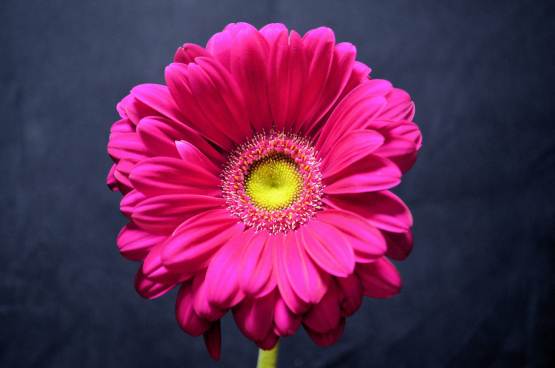

In [11]:
# lets take a look at the image
im

In [12]:
new_fl, new_rgbs = convert_image(im, ncolors = 10) # Converting the image to top 10 colours used.

finding 10 most common colors.  Note, if "ncolors" is large, this can take a while...
Done finding colors! cluster centres in RGB:
 [[104.62803754   4.65233786  34.93564605]
 [204.98882077 179.52470249  49.16660656]
 [ 13.38544162  12.9493084   26.74971022]
 [ 34.77739869  41.19569346  64.32376324]
 [230.87678621  35.44948568 123.28117876]
 [ 65.10201713  71.54235977 100.1906604 ]
 [ 48.45098954  56.0829946   82.68554674]
 [175.36592281   6.58409548  61.49085422]
 [250.59914085  71.68993896 188.43499887]
 [ 22.29681769  28.17807369  47.7280088 ]]


In [13]:
new_fl_data = np.array(new_fl)

In [14]:
number_of_pixels_of_a_color = [] # num of pixels at a particular color
color_labels = [] # how we label those colors on our histogram
color_values = [] # RGBA sequences

In [15]:
unique_flcolours = np.unique(new_fl_data.reshape(-1, new_fl_data.shape[2]), axis=0)
unique_flcolours # gives all the unique colour combinations that we will plot

array([[ 13,  13,  27],
       [ 22,  28,  48],
       [ 35,  41,  64],
       [ 48,  56,  83],
       [ 65,  72, 100],
       [105,   5,  35],
       [175,   7,  61],
       [205, 180,  49],
       [231,  35, 123],
       [251,  72, 188]], dtype=uint8)

This is a function used by the professor in class to plot all the colour values and colour labels that we have masked

In [16]:
for icolor,rgba in enumerate(unique_flcolours):
    #print(icolor, rgba)
    # we want to count pixels with whatever rgba combination
    # step 1: mask out pixels at a particular color
    reds_mask = new_fl_data[:,:,0] == rgba[0] 
    greens_mask = new_fl_data[:,:,1] == rgba[1]
    blues_mask = new_fl_data[:,:,2] == rgba[2]

    pixel_mask = reds_mask & greens_mask & blues_mask
    
    # step 2: count up all pixels
    npixels = len(new_fl_data[pixel_mask])
    
    # store the number of pixels for this rgba combo
    number_of_pixels_of_a_color.append(npixels) # appending to a list obj.
    # also want to name these colors
    color_labels.append("Color " + str(icolor))
    # last thing: color values
    color_values.append(rgba/255) # this is converting to matplotlib bar

In [17]:
color_labels # 

['Color 0',
 'Color 1',
 'Color 2',
 'Color 3',
 'Color 4',
 'Color 5',
 'Color 6',
 'Color 7',
 'Color 8',
 'Color 9']

In [18]:
color_values

[array([0.05098039, 0.05098039, 0.10588235]),
 array([0.08627451, 0.10980392, 0.18823529]),
 array([0.1372549 , 0.16078431, 0.25098039]),
 array([0.18823529, 0.21960784, 0.3254902 ]),
 array([0.25490196, 0.28235294, 0.39215686]),
 array([0.41176471, 0.01960784, 0.1372549 ]),
 array([0.68627451, 0.02745098, 0.23921569]),
 array([0.80392157, 0.70588235, 0.19215686]),
 array([0.90588235, 0.1372549 , 0.48235294]),
 array([0.98431373, 0.28235294, 0.7372549 ])]

In [19]:
number_of_pixels_of_a_color # total pixels of all the colours above

[14681, 41987, 25689, 32356, 13137, 12228, 22044, 2781, 18265, 21072]

Now that we have all peak colours of the image we will plot them on the histogram for better understanding with the downsized image next to it.

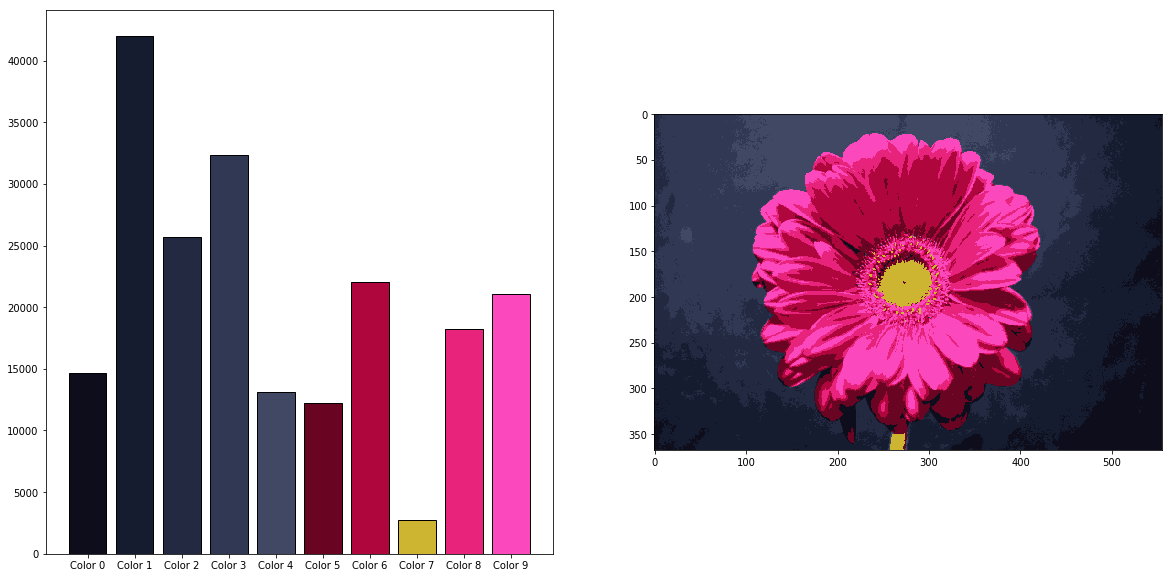

In [20]:
fig, ax = plt.subplots(1, 2, figsize=(20,10))

myBarChart = ax[0].bar(color_labels, number_of_pixels_of_a_color) # now I have a *vector* of axes
ax[1].imshow(new_fl_data)

# set colors of each bar individually
for i in range(len(myBarChart)): # for all bars in my barchart
    myBarChart[i].set_color(color_values[i])
    myBarChart[i].set_edgecolor('black')
    
plt.show()

## Now lets take a look at another Image
* I have chosen this image as it has a white backgroung and more natural occuring colours which is very soothing to the eyes. i wanted to see how different colour combinations can affect the perception of the image

In [21]:
path_to_image = 'C:/Users/npali/Data_Viz/Week_2/landscape.png'

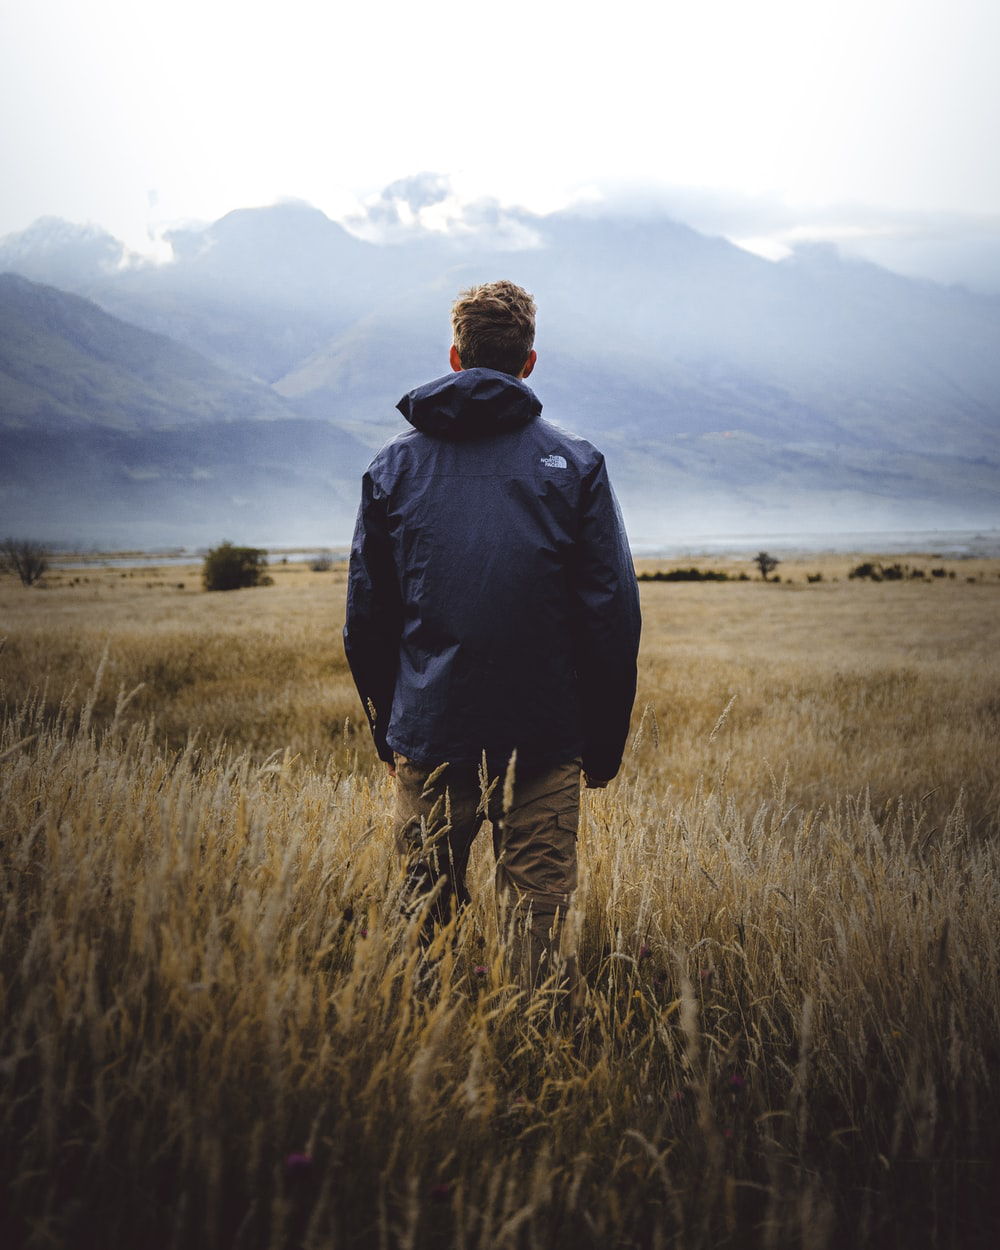

In [22]:
im2 = Image.open(path_to_image)
im2

In [23]:
new_ldscape, new_rgbs = convert_image(im2, ncolors = 10) # Converting the image to top 10 colours (peak)

finding 10 most common colors.  Note, if "ncolors" is large, this can take a while...
Done finding colors! cluster centres in RGB:
 [[253.43538998 253.62323628 253.99090379]
 [ 38.22677375  31.95811607  31.57116797]
 [125.29864053 104.98403414  74.30916851]
 [233.09344166 237.64088692 242.84086491]
 [155.76494031 169.36698598 192.02347306]
 [193.57389857 206.32948579 222.92304603]
 [ 61.80427012  51.44691564  43.36462538]
 [ 93.35886705  76.74206241  55.55294002]
 [160.22380212 139.78710883 107.45434813]
 [110.84105295 122.14529834 146.04608208]]


In [24]:
new_ldscape_data = np.array(new_ldscape)
new_ldscape_data[10]

array([[233, 238, 243],
       [233, 238, 243],
       [233, 238, 243],
       ...,
       [233, 238, 243],
       [233, 238, 243],
       [233, 238, 243]], dtype=uint8)

In [25]:
new_ldscape_data.shape # This is a 1250*1000 image with only RGB components

(1250, 1000, 3)

In [26]:
number_of_pixels_of_a_color_im2 = [] # num of pixels at a particular color
color_labels_im2 = [] # how we label those colors on our histogram
color_values_im2 = [] # RGBA sequences

In [27]:
unique_ldscape_colours = np.unique(new_ldscape_data.reshape(-1, new_ldscape_data.shape[2]), axis=0)
unique_ldscape_colours

array([[ 38,  32,  32],
       [ 62,  51,  43],
       [ 93,  77,  56],
       [111, 122, 146],
       [125, 105,  74],
       [156, 169, 192],
       [160, 140, 107],
       [194, 206, 223],
       [233, 238, 243],
       [253, 254, 254]], dtype=uint8)

Again we will use the same funtion that we used above to extract all the colour value and colour labels and number of pixels

In [28]:
for icolor,rgba in enumerate(unique_ldscape_colours):
    #print(icolor, rgba)
    # we want to count pixels with whatever rgba combination
    # step 1: mask out pixels at a particular color
    reds_mask = new_ldscape_data[:,:,0] == rgba[0] 
    greens_mask = new_ldscape_data[:,:,1] == rgba[1]
    blues_mask = new_ldscape_data[:,:,2] == rgba[2]

    pixel_mask = reds_mask & greens_mask & blues_mask
    
    # step 2: count up all pixels
    npixels = len(new_ldscape_data[pixel_mask])
    
    # store the number of pixels for this rgba combo
    number_of_pixels_of_a_color_im2.append(npixels) # appending to a list obj.
    # also want to name these colors
    color_labels_im2.append("Color " + str(icolor))
    # last thing: color values
    color_values_im2.append(rgba/255) # this is converting to matplotlib bar

In [29]:
color_values_im2

[array([0.14901961, 0.1254902 , 0.1254902 ]),
 array([0.24313725, 0.2       , 0.16862745]),
 array([0.36470588, 0.30196078, 0.21960784]),
 array([0.43529412, 0.47843137, 0.57254902]),
 array([0.49019608, 0.41176471, 0.29019608]),
 array([0.61176471, 0.6627451 , 0.75294118]),
 array([0.62745098, 0.54901961, 0.41960784]),
 array([0.76078431, 0.80784314, 0.8745098 ]),
 array([0.91372549, 0.93333333, 0.95294118]),
 array([0.99215686, 0.99607843, 0.99607843])]

In [30]:
number_of_pixels_of_a_color_im2

[260928, 134491, 151225, 52199, 118251, 123275, 79427, 98477, 62559, 169168]

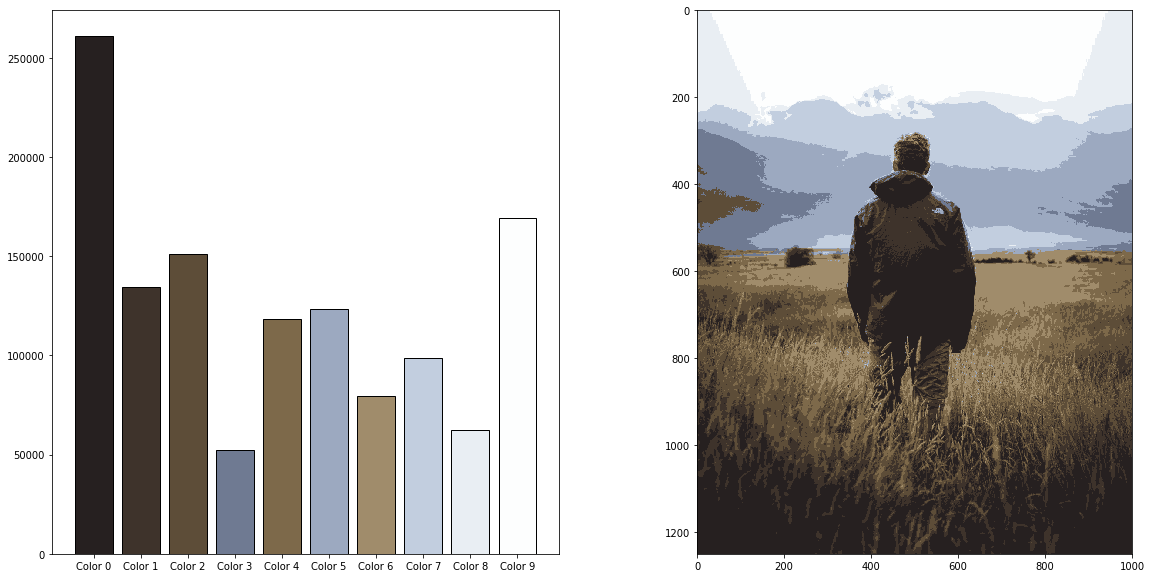

In [31]:
fig, ax = plt.subplots(1, 2, figsize=(20,10))

myBarChart = ax[0].bar(color_labels_im2, number_of_pixels_of_a_color_im2) # now I have a *vector* of axes
ax[1].imshow(new_ldscape_data)

# set colors of each bar individually
for i in range(len(myBarChart)): # for all bars in my barchart
    myBarChart[i].set_color(color_values_im2[i])
    myBarChart[i].set_edgecolor('black')
    
plt.show()

## Now lets take a look at another Image with more RGB prominant colours
* I have chosen this image as it comprises of basisc colours like Red, Yellow,Black and White. So I wanted to see how these colours are distributed in this image. Also the bacground of the image is Lightest blue so I want to check how can I plot my prominant colours on that.

In [32]:
path_to_image = 'C:/Users/npali/Data_Viz/week_2/birdie.png'

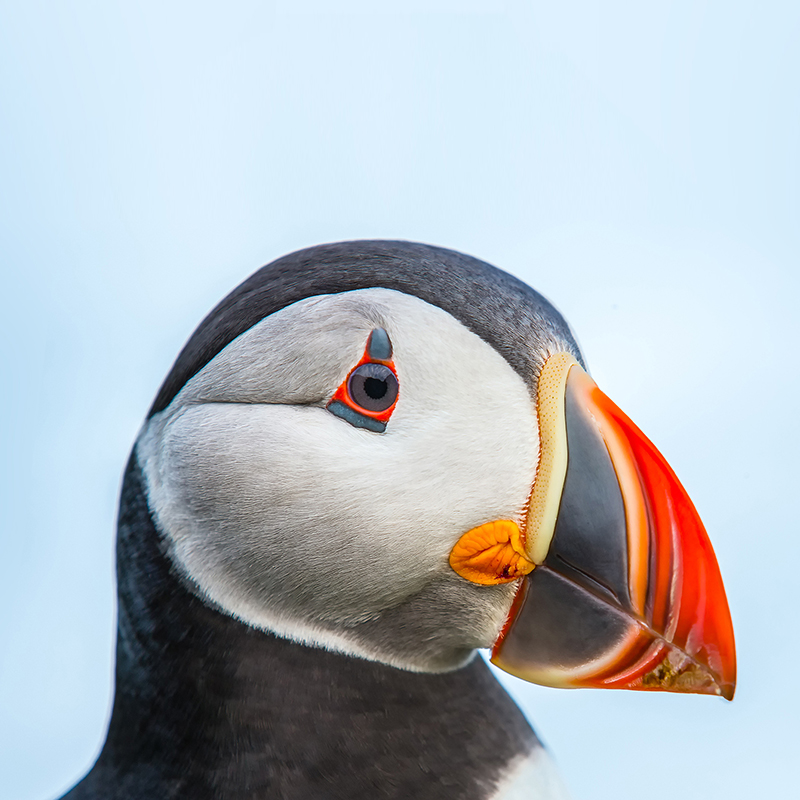

In [33]:
im3 = Image.open(path_to_image)
im3

In [34]:
new_birdie, new_rgbs = convert_image(im3, ncolors = 10) # Converting the image to 10 colours

finding 10 most common colors.  Note, if "ncolors" is large, this can take a while...
Done finding colors! cluster centres in RGB:
 [[202.33106263 229.75778493 247.86863803]
 [ 26.2943992   27.85469634  31.08028222]
 [158.09945421  64.68304023  21.7822923 ]
 [ 59.14567304  55.80385515  56.57999839]
 [144.60029255 140.96270033 139.16185449]
 [192.62469423 183.06858183 174.44546865]
 [219.72370531 219.53733138 216.43241204]
 [239.76792301  76.30711157  13.31189488]
 [ 96.50419236  97.32215371 101.11867599]
 [219.43064778 239.61059858 252.94942125]]


In [35]:
new_birdie_data = np.array(new_birdie)
new_birdie_data[10]

array([[202, 230, 248],
       [202, 230, 248],
       [202, 230, 248],
       ...,
       [219, 240, 253],
       [219, 240, 253],
       [219, 240, 253]], dtype=uint8)

In [36]:
new_birdie_data.shape # This is again a 800*800 RGB image

(800, 800, 3)

In [37]:
number_of_pixels_of_a_color_im3 = [] # num of pixels at a particular color
color_labels_im3 = [] # how we label those colors on our histogram
color_values_im3 = [] # RGBA sequences

In [38]:
unique_birdie_colours = np.unique(new_birdie_data.reshape(-1, new_birdie_data.shape[2]), axis=0)
unique_birdie_colours

array([[ 26,  28,  31],
       [ 59,  56,  57],
       [ 97,  97, 101],
       [145, 141, 139],
       [158,  65,  22],
       [193, 183, 174],
       [202, 230, 248],
       [219, 240, 253],
       [220, 220, 216],
       [240,  76,  13]], dtype=uint8)

We are again using the same function to extract all the colour value and colour labels and number of pixels

In [39]:
for icolor,rgba in enumerate(unique_birdie_colours):
    #print(icolor, rgba)
    # we want to count pixels with whatever rgba combination
    # step 1: mask out pixels at a particular color
    reds_mask = new_birdie_data[:,:,0] == rgba[0] 
    greens_mask = new_birdie_data[:,:,1] == rgba[1]
    blues_mask = new_birdie_data[:,:,2] == rgba[2]

    pixel_mask = reds_mask & greens_mask & blues_mask
    
    # step 2: count up all pixels
    npixels = len(new_birdie_data[pixel_mask])
    
    # store the number of pixels for this rgba combo
    number_of_pixels_of_a_color_im3.append(npixels) # appending to a list obj.
    # also want to name these colors
    color_labels_im3.append("Color " + str(icolor))
    # last thing: color values
    color_values_im3.append(rgba/255) # this is converting to matplotlib bar

In [40]:
color_values_im3

[array([0.10196078, 0.10980392, 0.12156863]),
 array([0.23137255, 0.21960784, 0.22352941]),
 array([0.38039216, 0.38039216, 0.39607843]),
 array([0.56862745, 0.55294118, 0.54509804]),
 array([0.61960784, 0.25490196, 0.08627451]),
 array([0.75686275, 0.71764706, 0.68235294]),
 array([0.79215686, 0.90196078, 0.97254902]),
 array([0.85882353, 0.94117647, 0.99215686]),
 array([0.8627451 , 0.8627451 , 0.84705882]),
 array([0.94117647, 0.29803922, 0.05098039])]

In [41]:
number_of_pixels_of_a_color_im3

[25321, 60551, 48643, 26806, 8718, 31264, 126353, 255504, 38443, 18397]

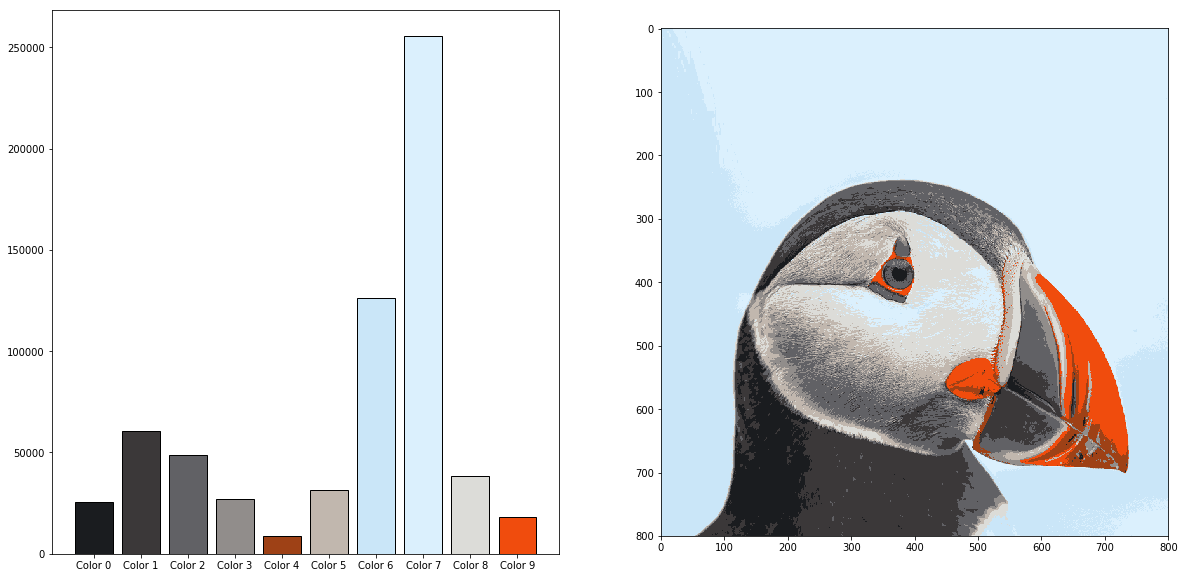

In [42]:
fig, ax = plt.subplots(1, 2, figsize=(20,10))

myBarChart = ax[0].bar(color_labels_im3, number_of_pixels_of_a_color_im3) # now I have a *vector* of axes
ax[1].imshow(new_birdie_data)

# set colors of each bar individually
for i in range(len(myBarChart)): # for all bars in my barchart
    myBarChart[i].set_color(color_values_im3[i])
    myBarChart[i].set_edgecolor('black')
    
plt.show()

## Now i wanted to check and plot the prominant Red and Blue Color on the graphs as we have seen in the class
* Also using this I was able to find out one problem with the downsampling function

In [55]:
# For color 7 (240,  76,  13)
reds_red_mask = new_birdie_data[:,:,0] == 240
greens_red_mask = new_birdie_data[:,:,1] == 76
blues_red_mask = new_birdie_data[:,:,2] == 13

#im_data[reds_good_mask]
pixel_mask_red = reds_red_mask & greens_red_mask & blues_red_mask

In [56]:
red_pixels = new_birdie_data[pixel_mask_red]
red_pixels

array([[240,  76,  13],
       [240,  76,  13],
       [240,  76,  13],
       ...,
       [240,  76,  13],
       [240,  76,  13],
       [240,  76,  13]], dtype=uint8)

In [57]:
number_red_pix = len(red_pixels)
number_red_pix

18397

In [58]:
# For color 9 (219, 240, 253)
reds_blue_mask = new_birdie_data[:,:,0] == 219
greens_blue_mask = new_birdie_data[:,:,1] == 240
blues_blue_mask = new_birdie_data[:,:,2] == 253

#im_data[reds_good_mask]
pixel_mask_blue = reds_blue_mask & greens_blue_mask & blues_blue_mask

In [59]:
blue_pixels = new_birdie_data[pixel_mask_blue]
blue_pixels

array([[219, 240, 253],
       [219, 240, 253],
       [219, 240, 253],
       ...,
       [219, 240, 253],
       [219, 240, 253],
       [219, 240, 253]], dtype=uint8)

In [60]:
number_blue_pix = len(blue_pixels)
number_blue_pix 

255504

In [61]:
new_birdie_data_Color6 = new_birdie_data.copy() # numpy way of copying data
new_birdie_data_Color6[~pixel_mask_red] =0

In [62]:
new_birdie_data_Color9 = new_birdie_data.copy() # numpy way of copying data
new_birdie_data_Color9[~pixel_mask_blue] =0

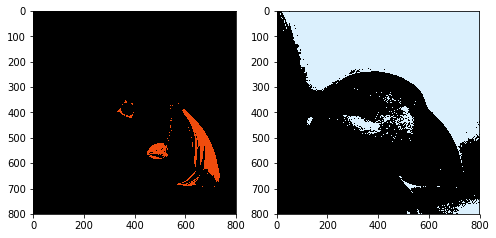

In [63]:
fig, ax = plt.subplots(1, 2, figsize=(8,4))

ax[0].imshow(new_birdie_data_Color6)
ax[1].imshow(new_birdie_data_Color9)
plt.show()

#### Issue1 
* Now in the above images I have selcted the values of Red and Blue colors based on the colors extracted from the function. But if i run the function again those values will change. So ther is a possibility once I run this piece of code again I will not get the similar grpahs as above.

Now we will use the function to convert the image to a specfic value provided by me.

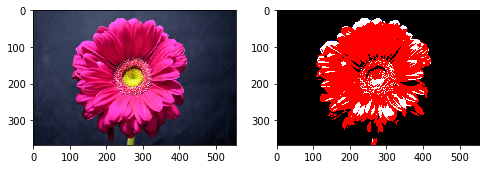

In [52]:
new_im1, new_rgbs2 = convert_image_specific(im, colors = [ [255, 255, 255], [255, 0, 0], [0,0,255], [0, 0, 0] ])
new_im1
fig, ax = plt.subplots(1, 2, figsize=(8,4))

ax[0].imshow(im)
ax[1].imshow(new_im1)
plt.show()

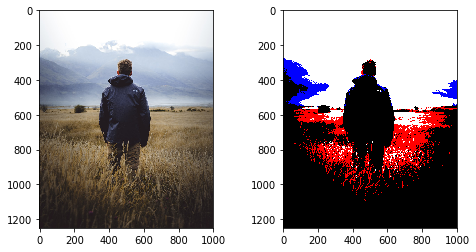

In [53]:
new_im2, new_rgbs2 = convert_image_specific(im2, colors = [ [255, 255, 255], [255, 0, 0], [0,0,255], [0, 0, 0] ])
fig, ax = plt.subplots(1, 2, figsize=(8,4))

ax[0].imshow(im2)
ax[1].imshow(new_im2)
plt.show()

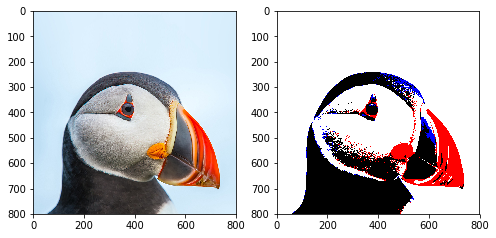

In [54]:
new_im3, new_rgbs2 = convert_image_specific(im3, colors = [ [255, 255, 255], [255, 0, 0], [0,0,255], [0, 0, 0] ])
fig, ax = plt.subplots(1, 2, figsize=(8,4))

ax[0].imshow(im3)
ax[1].imshow(new_im3)
plt.show()

#### Here all the three images chosen by me had different colour palate. The image we studied in class was an RGBA image that means it had an Alpha component in them. None of the above images here had alpha component in them hence no opacity. Below are my obervations based on these images:

* None of images had Alpha componet and hence there was no opacity
* Even thought he colours in the images varied drastically there was always one base colour which occupied maximum of the image
* In the 2nd landscape image and the third bird image there were similar shades of blue in a very large area, but there was not even a singel RGB combination which was common to both of them
* Even after downsizing the images the bird image was the most realistic to look at. This maybe because of the color combinations present in the image
* If we passed our own colour combinations the bird image still had the maximum number of common colour (appearance) as compared to the orignal image

### Question: Both of the color re-mappings presented in this notebook are not perfect.  What are some issues you can think of in how color is rebinned from a full color image into an image with less colors with the functions provided?


* The first and foremost thing that bothers me is when we use these functions to downsample the image is that they will only downsample the RGB or L mode images. So, when I try to downsample the stitched image it gave me an error as it was an RGBA image.
* Secondly, when we size down the palate using the Pillow library to the closest color, even though it is great to analyze the image for the peak colors or which color comprises the maximum part of the image, my dataset still is changing and I will never have the original data to begin with.
* So whatever visualizations I plot they will never be the perfect representation of the data. Further, if we change the image input manually it is a whole new data that we are generating with self substituted values.
* The best part about the code here was picking up the dominant/ most common color of the image as gives me the opportunity to understand what the image comprises of and to understand the palette better
* I feel if we can increase the bin size based on the palette we will be able to accommodate more unique colors from the dataset.
* Also one more issue witht this function is random selection of the colours while resizing the image as I have mentioned above in "Issue 1 #"
